<a href="https://colab.research.google.com/github/AnniMV/JODA2021/blob/main/Oppimispk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Viikko 1
Tästä alkaa "Johdanto datatieteeseen"-kussin oppimispäiväkirja. Viikko alkoi pehmeästi johdatuksella datatieteeseen ja kurssin sisältöön ja sen suorittamiseen, ja ensivaikutelmani on, että tämä on ensimmäinen ja käytännöllisin yliopiston kurssi koko opiskeluhistoriani ajalta, jossa teorian lisäksi tulen oppimaan käytännössä eri työkalujen käyttöä, ja jolla on yhteyksiä myös "todelliseen maailmaan". Odotukset ovat siis korkealla kurssin suhteen, ja toivon oppivani paljon datan keräämisestä ja visualisoinnista.

Kurssi alkoi kurssin suorittamisen läpikäymisellä ja siitä mitä datatiede pitää sisällään. Datatieteeseen ja data-analyytikon ominaisuuksiin kuuluu monitahoisesti useampi osa-alue, joita hallita; matematiikka ja tilastotiede, ohjelmointi- ja tietotekniset taidot, kommunikointi- ja visualisointitaidot sekä liiketoiminta- ja ongelmanratkaisutaidot. Sen sijaan että yksi henkilö hallitsisi kaikki osa-alueet laaja-alaisesti, voidaan haluttu päämäärä saavuttaa myös kokoamalla sopivasti eri kompetenssit omaava henkilöiden ryhmä, jotta käytetty tieto saadaan koottua ja esitettyä päätöksen tekoa tukevaksi. Data-analytiikassa käytetään paljon Python ohjelmointikieltä, ja Jupyter Notebook on kätevä tapa esittää Python koodia ja kommentteja. Tutustuttiin Pythonin Pandas data-analytiikkatyökaluun.
- Hyvä data-analyytikko hallitsee useampia osa-alueita Itsellä on ainakin osasta jo tietämystä.
- Dataa on valtavasti ja kasvavassa määrin tarjolla.
- Datan kerääminen ja käsittely vaatii työmäärältään eniten eri analyysivaiheista.
- Datan esittämisellä voidaan myös ohjailla ihmisten ajattelutapaa korostamalla tiettyjä osia ja jättämällä toisia osia pois.
- Opettelen käyttämään Googlen Colabia, sen käytön etuina on tallennustilan ja laskentakapasiteetin säästäminen omalta koneelta, ja helppo tallentaminen GitHubiin. 


Tilastotiede on yksi osa-alue josta data-analyytikolla pitäisi olla tietämystä. Linkissä https://seeing-theory.brown.edu/bayesian-inference/index.html voi testata itse bayesilaista päättelyä esimerkin kautta.

Osallistuin viikon opetukseen, ja aineistona käytin tiedostoa https://github.com/jodatut/2020/raw/master/koodiesimerkit/SalesJan2009.csv 

Koodissa tarkastellaan miten paljon eri tuotteita (Product) on tilattu eri maihin.




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://github.com/jodatut/2020/raw/master/koodiesimerkit/SalesJan2009.csv'
df = pd.read_csv(url)
print('List of attributes:', df.columns.values.tolist())
df.head()

List of attributes: ['Transaction_date', 'Product', 'Price', 'Payment_Type', 'Name', 'City', 'State', 'Country', 'Account_Created', 'Last_Login', 'Latitude', 'Longitude']


,Transaction_date,Product,Price,Payment_Type,Name,City,State,Country,Account_Created,Last_Login,Latitude,Longitude
0,1/2/09 6:17,Product1,1200,Mastercard,carolina,Basildon,England,United Kingdom,1/2/09 6:00,1/2/09 6:08,51.500000,-1.116667
1,1/2/09 4:53,Product1,1200,Visa,Betina,Parkville,MO,United States,1/2/09 4:42,1/2/09 7:49,39.195000,-94.681940
2,1/2/09 13:08,Product1,1200,Mastercard,Federica e Andrea,Astoria,OR,United States,1/1/09 16:21,1/3/09 12:32,46.188060,-123.830000
3,1/3/09 14:44,Product1,1200,Visa,Gouya,Echuca,Victoria,Australia,9/25/05 21:13,1/3/09 14:22,-36.133333,144.750000
4,1/4/09 12:56,Product2,3600,Visa,Gerd W,Cahaba Heights,AL,United States,11/15/08 15:47,1/4/09 12:45,33.520560,-86.802500


Tarkastellaan, kuinka monta kappaletta kutakin tuotetta on myyty maittain ja yhteensä.

In [ ]:
products = df.loc[:,["Country", "Product"]]
products.head()
dfprod = products.groupby(["Country"])["Product"].value_counts()
dfprod



Country         Product  
Argentina       Product1       1
Australia       Product1      30
                Product2       8
Austria         Product1       6
                Product2       1
                            ... 
United Kingdom  Product2      10
United States   Product1     401
                Product2      55
                Product3       7
                Product3       1
Name: Product, Length: 83, dtype: int64

In [ ]:

print(products.Product.unique())

number_of_prod = products["Product"].value_counts()
print(number_of_prod)

['Product1' 'Product2' 'Product3' 'Product3 ']
Product1     849
Product2     136
Product3      14
Product3       1
Name: Product, dtype: int64


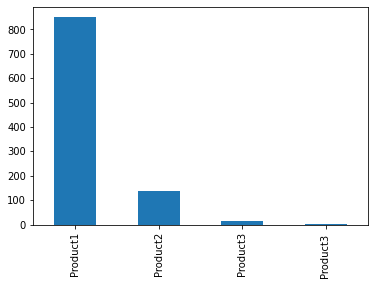

In [ ]:
number_of_prod.plot.bar()
plt.show()

# Viikko 2


Toisen viikon aiheena on datan kerääminen ja jalostaminen.
Datatieteen prosessimalli sisältää vaiheita. Datan keräämisvaiheessa on päätettävä mitä datalähdettä käytetään ja miten data kerätään. Datasta valitaan ydin jolla voidaan saavuttaa vastaus asetettuun kysymykseen tai ongelmaan. Analyysivaiheessa kirjoitetaan koodia jolla dataa käsitellään, tarkistetaan tuloksia. Arviointivaiheessa vertaillaan tuloksia, ja mietitään vastaako tulokset asetettuun kysymykseen, ja mietitään tarvitseeko tehdä muutoksia. Viimeiseksi, tulokset otetaan käyttöön, jotta analyysin teosta olisi hyötyä. Tulokset julkaistaan ja tulevat toimenpiteet voidaan toteuttaa ainakin osittain analyysiin nojautuen.

Liiketoiminnassa analytiikkaa voidaan hyödyntää eri tasoilla; esimerkiksi seurata liiketoiminnan perustietoja ja sen kehittymistä tai käyttää ennustamaan tulevaisuuden tapahtumia. Vaikka data-analytiikka liiketoiminnan apuna on ollut puheenaihe pidempään, kaikki yritykset eivät vielä hyödynnä sitä. Puutteita voi olla datan keräämisessä, sen tallentamisessa, teknologioiden hallitsemisessa ja analysointivaiheen toteuttamisessa.

Dataa voidaan kerätä verkkosivuilta ryömijöillä ja raapijoilla. Ryömijä on automatisoitu ohjelma, joka käy läpi verkkosivuja indeksoimalla haettavaa dataa, raapijalla kerätään automatisoidusti määrättyä tietoa verkkosivuilta. Käytännön toteutukset ovat usein näiden yhdistelmiä. Tälläkin tavoin kerätyn data-aineiston käytön laillisuus ja eettisyyskysymykset on huomioitava.

Ennen kuin datan analysointi varsinaisesti alkaa, sitä valmistellaan ja jalostetaan käytettävämpään muotoon. Datatyypit määrittävät mitä operaatioita datalle voi tehdä. Datasta voidaan tutkia esimerkiksi, ovatko datan tyypit tarkoituksenmukaista muotoa, ovatko tyhjät arvot merkitseviä analyysin kannalta ja miten tyhjät arvot voisi tulkita.

- Data-analytiikan käyttöaste yrityksessä riippuu varmasti paljon yrityksen koosta, sillä siitä riippuu, kuinka paljon yrityksellä on varaa panostaa datan käsittelyyn ja osaavaan henkilökuntaan. Voisi väittää että pienimmätkin yritykset tekevät vähintään perustason raportointia yrityksestään, mutta varsinaisesta data-analytiikasta kaikki eivät tule välttämättä taloudellisesti hyötymään.
- Ryömijöillä ja raapijoilla saadaan kerättyä dataa verkkosivuilta.
- Kun ryömijöitä ja raapijoita käytetään, on otettava huomioon käyttöehdot ja kohteen määrittelemät rajoitukset, jotta oma toiminta pysyy laillisuuden rajoissa.
- Kun käytettävä aineisto on kerätty ja koottu yhteen, dataa tutkitaan ja jalostetaan käytettävämpään muotoon.
- Dataa tutkimalla ja tarkastamalla voidaan varmistaa että datan tyypit ja sisältö vastaavat käyttötarkoitusta.


Toteutetaan  garnstudio.com raapija käyttäen pythonin scrapy kirjastoa. Haetaan garnstudion myymien lankojen nimet ja niiden hinnat.

In [ ]:
!pip install scrapy

     |████████████████████████████████| 245kB 8.5MB/s 
     |████████████████████████████████| 3.1MB 15.4MB/s 
     |████████████████████████████████| 256kB 39.3MB/s 
     |████████████████████████████████| 3.2MB 49.0MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 3.2MB 50.8MB/s 
     |████████████████████████████████| 81kB 7.7MB/s 
  Created wheel for protego: filename=Protego-0.1.16-cp37-none-any.whl size=7766 sha256=a236d68a5aa3e15698bcfaa8ad165fb799c78a35b020ad5fe2953742f1419a5d
  Stored in directory: /root/.cache/pip/wheels/51/01/d1/4a2286a976dccd025ba679acacfe37320540df0f2283ecab12
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.5-cp37-none-any.whl size=11517 sha256=b10bd68e9eac716163c5b2e8920a1152c4e4705d9f5f40b73be64c01f9f3e9f5
  Stored in directory: /root/.cache/pip/wheels/88/99/96/cfef6665f9cb1522ee6757ae5955feedf2fe25f1737f91fa7f
Successfully built protego PyDispatcher


In [ ]:
!scrapy genspider garnstudio_scraper garnstudio.com

Created spider 'garnstudio_scraper' using template 'basic' 


Raapija on seuraavanlainen:

In [ ]:
import scrapy


class GarnstudioScraperSpider(scrapy.Spider):
    name = 'garnstudio_scraper'
    allowed_domains = ['garnstudio.com']
    start_urls = ['https://www.garnstudio.com/yarns.php?cid=11']

    def parse(self, response):
        yarns = response.css('.prod_desc > h3').css('a::text').extract()
        prices = response.css('.price > p').css('strong::text').extract()
        for i in range(len(yarns)):
          yarn_prices = {
              'yarn' : yarns[i],
              'price' : prices[i]
          }         
          yield yarn_prices


In [ ]:
!scrapy runspider garnstudio_scraper.py -o out.json

2021-04-04 20:33:40 [scrapy.utils.log] INFO: Scrapy 2.4.1 started (bot: scrapybot)
2021-04-04 20:33:40 [scrapy.utils.log] INFO: Versions: lxml 4.2.6.0, libxml2 2.9.8, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 21.2.0, Python 3.7.10 (default, Feb 20 2021, 21:17:23) - [GCC 7.5.0], pyOpenSSL 20.0.1 (OpenSSL 1.1.1k  25 Mar 2021), cryptography 3.4.7, Platform Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic
2021-04-04 20:33:40 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.epollreactor.EPollReactor
2021-04-04 20:33:40 [scrapy.crawler] INFO: Overridden settings:
{'SPIDER_LOADER_WARN_ONLY': True}
2021-04-04 20:33:40 [scrapy.extensions.telnet] INFO: Telnet Password: 7821b237bf11107f
2021-04-04 20:33:40 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.feedexport.FeedExporter',
 'scrapy.extensions.logstats.LogStats']
2021-04-04 20:33

Haetut tiedot ovat out.json-tiedostossa.

[
{"yarn": "DROPS Air", "price": "5.70 EUR"},
{"yarn": "DROPS Alaska", "price": "2.40 EUR"},
{"yarn": "DROPS Alpaca", "price": "4.00 EUR"},
{"yarn": "DROPS Alpaca Boucl\u00e9", "price": "3.80 EUR"},
{"yarn": "DROPS Andes", "price": "5.40 EUR"},
{"yarn": "DROPS Baby Merino", "price": "3.80 EUR"},
{"yarn": "DROPS BabyAlpaca Silk", "price": "6.10 EUR"},
{"yarn": "DROPS Belle", "price": "2.40 EUR"},
{"yarn": "DROPS Big Delight", "price": "7.10 EUR"},
{"yarn": "DROPS Big Merino", "price": "3.80 EUR"},
{"yarn": "DROPS Bomull-Lin", "price": "3.10 EUR"},
{"yarn": "DROPS Brushed Alpaca Silk", "price": "3.10 EUR"},
{"yarn": "DROPS Cotton Light", "price": "1.50 EUR"},
{"yarn": "DROPS Cotton Merino", "price": "4.00 EUR"},
{"yarn": "DROPS Delight", "price": "3.60 EUR"},
{"yarn": "DROPS Fabel", "price": "2.70 EUR"},
{"yarn": "DROPS Flora", "price": "2.70 EUR"},
{"yarn": "DROPS Glitter", "price": "2.20 EUR"},
{"yarn": "DROPS Karisma", "price": "2.70 EUR"},
{"yarn": "DROPS Kid-Silk", "price": "4.95 EUR"},
{"yarn": "DROPS Lima", "price": "2.70 EUR"},
{"yarn": "DROPS Loves You 7", "price": "1.10 EUR"},
{"yarn": "DROPS Loves You 8", "price": "1.10 EUR"},
{"yarn": "DROPS Loves You 9", "price": "0.90 EUR"},
{"yarn": "DROPS Melody", "price": "5.30 EUR"},
{"yarn": "DROPS Merino Extra Fine", "price": "3.80 EUR"},
{"yarn": "DROPS Muskat", "price": "2.30 EUR"},
{"yarn": "DROPS Nepal", "price": "2.80 EUR"},
{"yarn": "DROPS Nord", "price": "2.80 EUR"},
{"yarn": "DROPS Paris", "price": "1.35 EUR"},
{"yarn": "DROPS Polaris", "price": "5.10 EUR"},
{"yarn": "DROPS Puna", "price": "3.40 EUR"},
{"yarn": "DROPS Safran", "price": "1.70 EUR"},
{"yarn": "DROPS Sky", "price": "5.90 EUR"},
{"yarn": "DROPS Snow", "price": "2.40 EUR"},
{"yarn": "DROPS Wish", "price": "5.70 EUR"}


# Viikko 3

Koneoppiminen on tekoälyn osa-alue ja se voidaan jaotella ohjattuun, ohjaamattomaan ja vahvistettuun oppimiseen. 

Ohjatulla oppimisella tarkoitetaan tilannetta, jossa koneelle opetetaan opetusdatalla ennustamaan jotakin tapahtumaa. Usein data on jaettu kahteen osaan niin että testidatalla voidaan tarkistaa opetusvaiheen mallin toimivuus. Käytännön sovellusten esimerkkeinä tästä voisi mainita asiakaskäyttäymisen ennustaminen ja tuotesuosittelu asiakkaalle. Ohjaamattomassa oppimisessa dataa ei ole luokiteltu, vaan se pyritään kuvaamaan oppimalla jokin dataan sopiva malli. Vahvistettu oppiminen perustuu ajatukseen, jossa ympäristö antaa positiivisen tai negatiivisen palautteen, ja algoritmi pyrkii löytämään ratkaisun joka antaa eniten posiitiivista palautetta.

Ohjatussa koneoppimisessa piirteiden erottaminen on keskeinen vaihe mallin kehittämisvaiheessa. Oikein löydetyillä piirteillä voi vaikuttaa algoritmin suorituskykyyn parantavasti, ja toisaalta huonosti valitut piirteet saavat aikaiseksi heikon algoritmin. Piirteet erotellaan datasta ennen opetusdatan käyttöä. Mallin suoritusta arvioidaan testidatalla ja tarvittaessa valitaan uusia piirteitä, ja testataan taas algoritmin toimivuutta.


- On ilmeistä, että ilman kunnon datamäärää, järkevää analyysiä ei voida tehdä, joten analyysin teko alkaa  kattavan aineiston keräämisellä ja ylläpidolla.
- Nykyisin vallitsevana teknologiana käytetään tilastollista oppimista, jota on esimerkiksi koneoppiminen.
- Piirteiden erottamisella on merkittävä osuus algoritmin toimivuuden kannalta.
- Varsinaisia tekoälysysteemejä ei ole vielä kehitetty, tai julkaistu. 
- Lineaariregressio on yksinkertainen ohjatun oppimisen menetelmä. Data-alueen ulkopuolelta ennustaminen on epävarmempaa, sillä ei ole näyttöä siitä käyttäytyykö selitettävä muuttuja lineaarisesti tutkitun alueen ulkopuolella.

Tekoälyjärjestelmiä on olemassa monentasoisia, mutta yhdistävänä tekijänä on se että ne ovat kaikki ihmisen kehittelemiä ja ne vaativat paljon ihmistyötä toimiakseen.  Se synnyttää erilaisia rutiinitehtäviä, joita suorittavat työntekijät ympäri maailmaa. Dokumentti https://yle.fi/aihe/artikkeli/2020/04/23/ulkolinja-nakymattomat-tyontekijat-alipalkatut-avustajat-koulivat-tekoalya-ja kertoo alipalkatuista ja näkymättömäksi jääneistä internetin työntekijöistä, jotka omalta osaltaan antavat panoksensa yrityksille ja teknologialle halpaan hintaan.

Osallistuin opetukseen. Datana käytän kagglesta ladattua diabetes datasettiä, https://www.kaggle.com/tigganeha4/diabetes-dataset-2019.

In [ ]:

!pip install sklearn
!pip install numpy

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

df=pd.read_csv('diabetes_dataset__2019.csv')
df.head()


,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no


Tarkastellaan sarakkeita Gender, Family_Diabetes ja Diabetic.

In [ ]:
data = df.loc[:,['Gender','Family_Diabetes','BMI','Diabetic']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           952 non-null    object 
 1   Family_Diabetes  952 non-null    object 
 2   BMI              948 non-null    float64
 3   Diabetic         951 non-null    object 
dtypes: float64(1), object(3)
memory usage: 29.9+ KB


In [ ]:
data.isna().sum()

Gender             0
Family_Diabetes    0
BMI                4
Diabetic           1
dtype: int64

Diabetic-sarakkeessa on yksi puuttuva arvo, joten poistetaan tämä rivi.

In [ ]:
data = data.dropna(subset=['Diabetic'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 0 to 951
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           951 non-null    object 
 1   Family_Diabetes  951 non-null    object 
 2   BMI              948 non-null    float64
 3   Diabetic         951 non-null    object 
dtypes: float64(1), object(3)
memory usage: 37.1+ KB


Muutetaan Diabetic-muuttujan arvot kategorisiksi arvoiksi.

In [ ]:
arr = preprocessing.LabelEncoder().fit_transform(data.Diabetic)
data.Diabetic = arr

In [ ]:
y = data.Diabetic

In [ ]:
data = data.drop(columns='Diabetic')


In [ ]:
data['BMI']

0      39.0
1      28.0
2      24.0
3      23.0
4      27.0
       ... 
947    25.0
948    27.0
949    23.0
950    27.0
951    30.0
Name: BMI, Length: 951, dtype: float64

In [ ]:
# Käytetään imputointimenetelmää puuttuviin BMI arvoihin korvaamalla ne havaittujen arvojen keskiarvolla.
#data['BMI'] = data['BMI'].astype(float)
imputer = SimpleImputer()


In [ ]:
data[['BMI']] = imputer.fit_transform(data[['BMI']])


data.isnull().sum()

Gender             0
Family_Diabetes    0
BMI                0
dtype: int64

In [ ]:


# Muutetaan kategoriset muuttuja dummy-arvoiksi

X = pd.get_dummies(data)
data.info()
X.info()
X.corr()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 0 to 951
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           951 non-null    object 
 1   Family_Diabetes  951 non-null    object 
 2   BMI              951 non-null    float64
dtypes: float64(1), object(2)
memory usage: 29.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 0 to 951
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BMI                  951 non-null    float64
 1   Gender_Female        951 non-null    uint8  
 2   Gender_Male          951 non-null    uint8  
 3   Family_Diabetes_no   951 non-null    uint8  
 4   Family_Diabetes_yes  951 non-null    uint8  
dtypes: float64(1), uint8(4)
memory usage: 18.6 KB


,BMI,Gender_Female,Gender_Male,Family_Diabetes_no,Family_Diabetes_yes
BMI,1.000000,0.119635,-0.119635,-0.114737,0.114737
Gender_Female,0.119635,1.000000,-1.000000,-0.096158,0.096158
Gender_Male,-0.119635,-1.000000,1.000000,0.096158,-0.096158
Family_Diabetes_no,-0.114737,-0.096158,0.096158,1.000000,-1.000000
Family_Diabetes_yes,0.114737,0.096158,-0.096158,-1.000000,1.000000


# Viikko 4

Tällä viikolla käydään läpi harjoitustyön prosessia.  [Harjoitustyön ohjeet](https://infotuni.github.io/joda2021/harjoitustyo/) löytyvät kurssin omilta sivuilta.

Datatiedeprojekti lähtee liikkeelle ongelmasta tai kysymyksestä johon halutaan vastaus. Tällä luennolla keskitytään ongelman tunnistamiseen, kenelle ratkaisua haetaan ja minkälaisia ratkaisuja on jo olemassa. Lisäksi voi pohtia, minkälaisia ratkaisuja projekti tarjoaa, miten ratkaisua käytetään ja miten käyttäjät hyötyvät siitä, miten ratkaisun arvoa voi mitata, miten se vaikuttaa tulevaan toimintaan ja mitä koko projekti maksaa.

Luennolla käsiteltiin  Airbnb:n majoitus- ja elämysjohtajan viikkokatsausta. Liiketoimintaongelmana on ilmennyt, että yritys on saanut negatiivista palautetta sekä vieraskäyttäytymisestä että majoituskohteista. Arviointipalautteista tehtyjen analyysien pohjalta on päädytty toimenpiteisiin, joilla lisätään palvelun laatua ja luotettavuutta.

Miten mitata data-analyysin hyödyllisyyttä? Tähän on esitetty kolme kohtaa: laatu, nopeus ja robustisuus. Laadun indikaattorina voidaan käyttää esimerkiksi tuottoa, hintaa, tehokkuutta tai asiakastyytyväisyyttä. Nopeus voi auttaa saavuttamaan paremman aseman markkinoilla ja ainakin työmäärä kevenee. Hyvässä mallissa otetaan huomioon myös poikkeukset ja vaihtelevat tilanteet jotta malli on kestävä vaikka olosuhteet muuttuisivat.

Miten aloittaa harjoitustyö? Todo-lista:
- Mieti jokin kiinnostava kysymys johon haluat vastauksen.
- Mieti onko siihen olemassa sopivaa dataa ja millä tavoin hankit sen.
- Tutki dataa; minkälaista tietoa se sisältää? Aloita datan putsaaminen: Tarkista virheet ja tietotyypit, tarkista muuttujat ja puuttuvat arvot.
- Rikasta dataa. Löydä keino yhdistää eri lähteistä tulevat data yhdeksi. Muuta muuttujia muotoon jotka palvelevat ongelmakysymystä paremmin.
-Visualisointi: mieti mitkä kuvat ovat oikeasti arvokkaita. Katso vinkit jinja2, tablesorter, streamlit.
- Aloita mallintaminen.


Alustuksena voisi luennon alkuun käydä läpi vielä tarkemmin CRISP-DM -prosessia, mitä sillä tarkoitetaan, mikä on sen rakenne. Silloin olisi helpompi seurata esimerkkiäkin prosessin näkökulmasta.

Ajatusten vaihtoa voisi heitellä myös koko ryhmän kesken kuin erillisissä breakout huoneissa. Kaikki eivät kumminkaan ole niin innokkaita osallistumaan, joten tehtävän alustus ja esimerkkien anto voisi antaa paremmin kuvan mitä tehtävissä haetaan ja saada ajatustenvaihtoa lennokkaammaksi.

Jatkan edellisen viikon kagglesta ladatun https://www.kaggle.com/tigganeha4/diabetes-dataset-2019 diabetes-datasetin käsittelyä. Käytetään viimeksi siivottua dataa.

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn import preprocessing

Tarkastellaan ennustemallia onko henkilöllä diabetes, ja tutkitaan sen tarkkuutta.

In [ ]:
#Jaetaan aineisto opetus- ja testiaineistoon.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# opetetaan malli opetusdatalla
reg = LogisticRegression().fit(X_train, y_train)

#ennusteet testidatalla
predictions = reg.predict(X=X_test)

#lasketaan tarkkuus
accuracy = accuracy_score(y_test, predictions)

reg2 = SGDClassifier().fit(X_train, y_train)
accuracy2 = accuracy_score(y_test, reg2.predict(X=X_test))



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Normalisoidaan vielä data ja katsotaan onko tällä merkitystä

XMean = np.mean(X, axis=0)
XDev = np.std(X, axis=0)
XNorm = (X - XMean) / XDev



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(XNorm, y, test_size=0.25)

# opetetaan malli opetusdatalla
reg3 = LogisticRegression().fit(X_train, y_train)

#lasketaan tarkkuus
accuracy3 = accuracy_score(y_test, reg3.predict(X=X_test))

reg4 = SGDClassifier().fit(X_train, y_train)
accuracy4 = accuracy_score(y_test, reg4.predict(X=X_test))

In [ ]:
print(accuracy)
print(accuracy2)
print(accuracy3)
print(accuracy4)

0.7016806722689075
0.7142857142857143
0.7100840336134454
0.6596638655462185


# Viikko 5
Vierailevana luennoitsijana oli Data Engineer Teemu Mikkonen Solitalta puhumassa luonnollisen kielen analyysistä ja datatiedeprojektista yrityspuolella. Mukana myös Solitan Timo Lehtonen. Vierailuluennon materiaali on saatavissa osoitteessa https://github.com/TeemuMikkonen/JODA-NLP.

Luonnollisen kielen prosessointi (NLP) on yksi datatieteen ala, jossa luonnollisen kielen tekstiä käsitellään ja jalostetaan datatieteen analysointia varten. NLP:n tekniikoilla rakenteetonta tekstidataa luokitellaan koneille käsiteltävämpään muotoon. Sovellusalueita on esimerkiksi chatbotit, tekstien luokittelu, esim. sähköpostit, ja automaattiset konekäännökset.

Esimerkkikohteena käytettiin luokitteluongelmaa, jossa ministerien vastaukset kirjallisiin kysymyksiin tulisi luokitella tehdyn mallin avulla sitä vastaavaan luokkaan.

Prosessi alkaa tekstin esikäsittelyllä ja piirteiden erottamisella. Esikäsittelyllä pyritään siihen, että koneoppimisprosessissa opetusdata on laadukasta ja tasaista (malli ei esimerkiksi painota jotakin luokkaa ja teksti on helposti luokiteltavaa). Esikäsittelyvaiheita esimerkkitapauksessa olivat hukkasanojen poisto, erikoismerkkien poisto, pienet alkukirjaimet ja sanojen perusmuotoon muuttaminen. Hukkasanat tekstissä ovat sellaisia sanoja, jotka eivät tuo lisäarvoa tekstin analysointiin. Asiayhteydestä riippuu, millaiseksi lista muodostuu, mutta esim. partikkelit (kuten ja, tai, kuin, että) ovat esimerkkejä hukkasanoista.

Mallin opetusvaiheessa käytetään valittua NLP-työkalua (fasttext, nltk) tekstin luokitteluun. Koneoppimisessa käytetään menetelmiä joissa sanoja käsitellään vektoreina. Vektorit auttavat löytämään paremmin sanojen merkityksiä ja kielellisiä yhteyksiä. Mallin avulla ennustetut luokat ovat vain arvioita ja sataprosenttiseen tarkkuuteen harvoin päästään, joten toimivampaa on tarkastella mihin luokkaan teksti todennäköisimmin kuuluu ja millä tarkkuudella.






- Luonnollisen kielen prosessointiin on kehitetty hyödyllisiä kirjastoja ja työkaluja; ja menetelmät kehittyvät koko ajan.
-Tekstimöykky saadaan suhteellisen selkein keinoin muokattua koneelle ymmärrettävään muotoon ja muodostettua siitä toimiva malli.
-Olennainen vaihe prosessissa on esikäsittelyvaihe, josta oli luennolla selkeä esimerkki.
-Koska ei ole universaalia teoriaa siitä, millä menetelmällä ja parametreilla saadaan parhaiten toimiva malli, on yhdisteltävä yritystä ja erehdystä,  iterointia, ja omaa tietämystä sopivan mallin löytymiseksi.
- Esityksessä käytettyyn Colabin lomakkeen (forms) käyttöön täytyy itsekin tutustua paremmin, https://colab.research.google.com/notebooks/forms.ipynb


https://github.com/TeemuMikkonen/JODA-NLP

https://data.solita.fi/finnish-stemming-and-lemmatization-in-python/

fastText-sivusto: https://fasttext.cc/



Osallistuin opetukseen. Testaillaan Voikkoa tekstiotteella, joka on Ylen Uutisista kopioitu.

In [ ]:
!pip install awscli

     |████████████████████████████████| 1.4MB 6.4MB/s 
     |████████████████████████████████| 7.5MB 17.1MB/s 
     |████████████████████████████████| 552kB 28.7MB/s 
     |████████████████████████████████| 81kB 7.2MB/s 
     |████████████████████████████████| 153kB 49.9MB/s 
  Created wheel for awscli: filename=awscli-1.19.72-py2.py3-none-any.whl size=3604125 sha256=76c5ad9a2103c2cbbd2b9ff01eb85c5aab51dca379121e3fbcc91939a9abc25d
  Stored in directory: /root/.cache/pip/wheels/83/1d/23/6f0b3dd4b37dc202fa18bec98faba268175da4fed68ce75551
Successfully built awscli
ERROR: requests 2.23.0 has requirement urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you'll have urllib3 1.26.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Found existing installation: docutils 0.17.1
    Uninstalling 

In [ ]:
!sudo apt -y install -y voikko-fi python-libvoikko

Reading package lists... Done
Building dependency tree       
Reading state information... Done
voikko-fi is already the newest version (2.2-1).
python-libvoikko is already the newest version (4.1.1-1.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
from libvoikko import Voikko


In [ ]:
#Tavutetaan tekstiote.
v = Voikko(u"fi")


hyphenated_words = []

text = "Tampereella pääsi hyppäämään raitiovaunuun maanantaista \
        puolestapäivästä alkaen kuka vain maksua vastaan. Kyytiin pitää tosin \
        ilmoittautua, ja maksu pitää hoitaa etukäteen."

words = text.split(" ")

for word in words:
  word = word.strip()
  if len(word) == 0:
    continue
  else:
    voikkohyph = v.hyphenate(word)
    hyphenated_words.append(voikkohyph)

print("Tavutettu:",  " ".join(hyphenated_words))


Tavutettu: Tam-pe-reel-la pää-si hyp-pää-mään rai-ti-o-vau-nuun maa-nan-tais-ta puo-les-ta-päi-väs-tä al-ka-en ku-ka vain mak-su-a vas-taan. Kyy-tiin pi-tää to-sin il-moit-tau-tu-a, ja mak-su pi-tää hoi-taa e-tu-kä-teen.


#Viikko 6
Perehdytään ohjaamattomaan koneoppimiseen ja mietitään miten se eroaa ohjatusta oppimisesta. Ohjatussa koneoppimisessa pyritään ennustamaan y kun annettuna on X, mutta on tapauksia, joissa data koostuu merkitsemättömistä datajoukoista. Tällöin tarvitaan ohjaamatonta koneoppimista ja analyysissä pyritään löytämään datasta yhdistäviä rakenteita ja ryhmiä ilman ennakko-oletuksia datan luokittelusta. Ohjaamattoman oppimisen menetelmiä ovat mm. ryvästäminen, assosiaatiosäännöt, aihemallinnus ja ulottuvuuksien vähentäminen.

**Ryvästäminen** Luennolla käytiin läpi esimerkki ryvästämisestä K-Means -algoritmilla. Ryvästämisellä tarkoitetaan sitä että data ryhmitellään samankaltaisuuden perusteella. K-Means analyysissä käytetään hyväksi datapisteiden mitattavaa etäisyyttä k-ryppään keskuspisteestä. Rypäs muodostuu datapisteistä, jotka ovat lähimpänä ryppään keskuspistettä.

K-Means ryvästämisessä käytetään siis vain numeerisia arvoja sisältäviä muuttujia. Kuten muissakin analyyseissa, prosessi aloitetaan datan jalostamisella. Dataan valitaan sellaiset muuttujat, jotka sopivat analyysiin, normalisoidaan data ja valitaan sopiva ryppäiden lukumäärä. Sopiva määrä ryppäitä voidaan määrittää esimerkiksi niin että haetaan sellainen piste jossa ryppäiden lisäämisellä ei ole merkittävää hyötyä tarkkuudessa.

**Aihemallinnus** Aihemallinnus on menetelmä luonnollisen kielen analyysiin. Tekstiaineistosta pyritään löytämään aihekokonaisuuksia, jotka toistuvat aineistossa. Tässäkin menetelmässä aineisto on ensin esikäsiteltävä. Nyt tekstimuotoinen data käsitellään siihen muotoon että sieltä on helpompi löytää yhteisiä aiheita. Luennolla käydyssä esimerkissä tekstistä poistetaan numerot, välimerkit, lyhyet sanat ja hukkasanat.

Aihemallin luomiseen voidaan käyttää Gensim-kirjastoa, joka on kehitelty juuri luonnollisen kielen analyysiin. Kun mallinnus on tehty, on taas mietittävä mikä on sopiva määrä aiheita. Tässä voidaan käyttää eri lähestymistapoja ja menetelmiä, sillä 'oikean' määrän määrittäminen on tapauskohtaista ja vaatii paljon analysointia.



- Aineiston esikäsittely ja muokkaus vaikuttaa siihen millainen analyysin lopputulos on.
- Aineistoa on tutkittava ja etsittävä syitä miksi analyysin lopputulos on se mikä on (esim outlierit ja datamuuttujien jakauma vaikuttavat)
- Demoluennolla käyty esimerkki pääkomponenttianalyysista (PCA) oli havainnollistava miten aineistoa voidaan kuvailla pienemmällä määrällä muuttujia.
- Vaikka puhutaan ohjaamattomasta oppimisesta, tarvitaan silti datan esikäsittelyä ja menetelmän valintaan ihmisen päätöksentekoa.
- Ohjaamattomassa oppimisessa algoritmi löytää luokkia ja aiheita, mutta algoritmi ei pysty nimeämään niitä.

Kehityskohde: Ryvästämisestä voisi vielä kertoa lisää miten tätä analyysin tulosta voidaan käyttää hyväksi.

Kokeillaan ryvästämistä Kagglesta ladatulla metsäpalodatalla, https://www.kaggle.com/vikasukani/forest-firearea-datasets.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("forestfires.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [4]:
#Valitaan tarkasteltavat sarakkeet
dfcluster = df[['X','Y','temp','wind']]

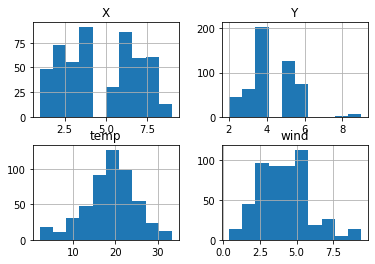

In [5]:
hist = dfcluster.hist()

In [17]:
kmeans = KMeans(n_clusters=4).fit(dfcluster)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 4.22613065  4.07537688 20.89547739  3.86331658]
 [ 4.95774648  4.4084507   8.72676056  4.96619718]
 [ 5.01030928  4.46391753 26.72164948  3.50515464]
 [ 4.9         4.44       15.97266667  4.10466667]]


Katsotaan miltä klusterit näyttävät lämpötilan ja tuulen suhteen.

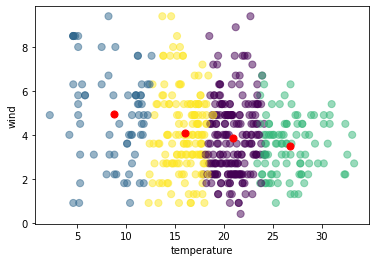

In [18]:
plt.scatter(df['temp'], df['wind'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 2], centroids[:, 3], c='red', s=50)
plt.xlabel('temperature')
plt.ylabel('wind')
plt.show()

#Viikko 7
Visuaalista analyysia tarvitaan niin kerätyn datan tutkimiseen ja sen hahmottamiseen (eksploratiivinen analytiikka) kuin lopullisen tuotteen havainnolliseen esittämiseen ja tiedon jakamiseen (kommunikointi). Kommunikoivan visualisoinnin tavoitteena on saada kohdekäyttäjät kiinnostumaan ja oppimaan aineistosta kiinnostavalla ja helposti ymmärettävällä tavalla. Muistilistaa joistakin visualisoinnin periaatteista:

>*   Käytä hyvälaatuista dataa
*    Jalosta dataa
*   Huomioi datasta keskeisimmät piirteet joilla dataa kuvataan ja visualisoi ne
*   Tee selkeitä ja tarpeeksi yksinkertaisia kuvia, jotta niitä ei voi tulkita väärin
*   Käytä oikeanlaista visualisointityyppiä
*   Tee käyttäjälle vuorovaikutteisia visualisointeja; huomioi kohdeyleisö





Visualisointiin on erilaisia välineitä ja sovelluksia tarjolla visualisointityyppien valinnasta vuorovaikutteisten visuaalisten esitysten tekemiseen. Luennolla esiteltiin vuorovaikutteisen datasovelluksen tekoa Streamlitilla.

- Huonosti tehty visualisointi johtaa helposti harhaan ja voi tuottaa vääriä päätelmiä
- Datan liiallinen manipulointi häivyttää datan todellisen informaation
- Mieti millaisia kuvaajia teet, mahdollisuuksia on monenlaisia
- Vuorovaikutteisella visualisoinnilla käyttäjä pääsee lähemmin tutkimaan dataa
- Vuorovaikutteisen visualisoinnin työkalu/sovellus datatuotteena


Kehitysehdotuksia:
- Kurssin sivuilla voisi olla jonkinlainen kooste tai lukujärjestys kurssin viikkoaikatauluista ja eräpäivistä. Nyt tietoa löytyy hajanaisesti eri sivuilla. Tuni.fi opintojaksosivuilla kurssin päättymispäiväksi on merkitty 6.5. ja viimeinen demoluento olisi 7.5. kun taas todellisuudessa viimeinen luento oli 27.4. Kurssin töiden palautuspäivämääriä voisi myös kohdentaa yhteen paikkaan selkeyden vuoksi.
- Miksihän harjoitustyön osien palautuspäivä on kesken luentoviikon? Voisiko se olla esimerkiksi loppuviikkoon mennessä? Silloin ehtisi paremmin hyödyntää myös luennoista opittua.